# Subject: Data Science Foundation

## Session 13 - Correlation in Python.

### Demo1 -  Calculating Correlation in Pandas

We will be using a dataset on vehicle fuel efficiency from University of California, Irvine.

https://archive.ics.uci.edu/ml/datasets/Auto+MPG

Let's say it is of interest to see what vehicle characteristics can help explain fuel consumption (mpg) of a vehicle. We begin by reading the dataset from the UCI online data repository and examining first few rows. Dataset documentation states that a special character is used for missing values (?), which can be used as one of the parameters to pandas read_csv() function:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cylinders', 'displacement','horsepower',
            'weight', 'acceleration', 'model_year', 'origin', 'name'],
            na_values='?')

In [17]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [27]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [18]:
mpg_data.shape 

(398, 9)

Upon inspecting the dataset, we see that horsepower has six missing values, which pandas' correlation method will automatically drop. Since the number of missing values is small, this setting is acceptable for our illustrative example. However, always make sure that dropping missing values is appropriate for your use case. If that is not the case, there are many existing methods for filling in and handling missing values, such as simple mean imputation.

In [19]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [20]:
print(mpg_data.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001238FA20>]], dtype=object)

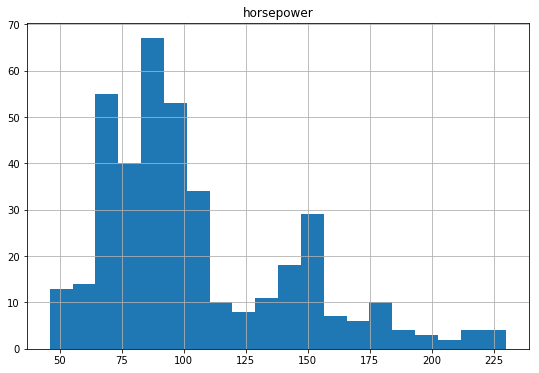

In [21]:
mpg_data.hist(column='horsepower',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

In [23]:
new_horsepower_var = np.where(mpg_data["horsepower"].isnull(), # Logical check
                       104,                       # Value if check is true
                       mpg_data["horsepower"])     # Value if check is false

mpg_data["horsepower"] = new_horsepower_var 

mpg_data["horsepower"].describe()

count    398.000000
mean     104.462312
std       38.199230
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000125FBA20>]], dtype=object)

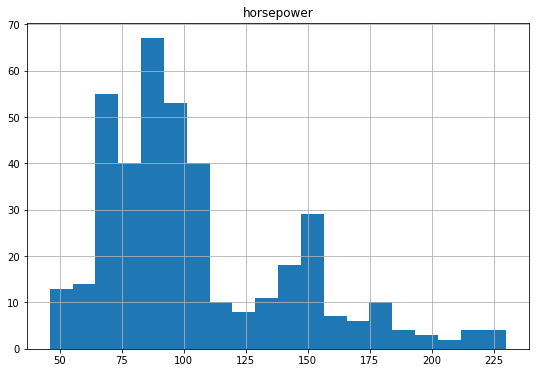

In [24]:
mpg_data.hist(column='horsepower',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

Pandas provides a convenient one-line method corr() for calculating correlation between data frame columns. In our fuel efficiency example, we can check whether heavier vehicles tend to have lower mpg by passing the method to specific columns:

In [25]:
mpg_data['mpg'].corr(mpg_data['weight'])

-0.8317409332443354

As expected, there seems to be a strong negative correlation between vehicle weight and mpg. But what about horsepower or displacement? 

# Task 1: Test with other variables: 'cylinders', 'displacement','horsepower', 'acceleration', 'model_year' and 'origin'.

> Put your code here

Conveniently, pandas can quickly calculate correlation between all columns in a dataframe. The user can also specify the correlation method: Spearman or Pearson. If no method is specified, Pearson is used by default. Here, we drop "model year" and "origin" variables and calculate Pearson correlation between all remaining columns of the data frame:

In [34]:
# pairwise correlation
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.821864,-0.855692,-0.843180,-0.874947,0.438677
cylinders,-0.821864,1.000000,0.911876,0.808620,0.873314,-0.474189
displacement,-0.855692,0.911876,1.000000,0.866670,0.945986,-0.496512
horsepower,-0.843180,0.808620,0.866670,1.000000,0.868659,-0.647557
weight,-0.874947,0.873314,0.945986,0.868659,1.000000,-0.404550
acceleration,0.438677,-0.474189,-0.496512,-0.647557,-0.404550,1.000000


Pandas also supports highlighting methods for tables, so it is easier to see high and low correlations. It is important to understand possible correlations in your data, especially when building a regression model. Strongly correlated predictors, phenomenon referred to as multicollinearity, will cause coefficient estimates to be less reliable. Below is an example of calculating Pearson correlation on our data and using a color gradient to format the resulting table:

In [38]:
mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Finally, we can plott a diagonal correlation matrix:

In [43]:
import seaborn as sns

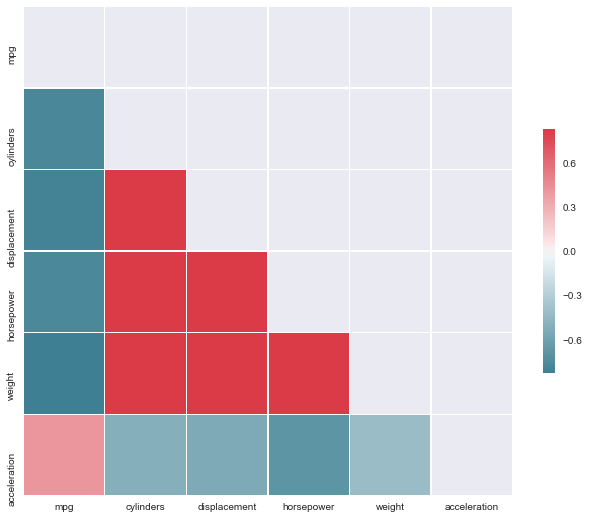

In [45]:
# Compute the correlation matrix

corr = mpg_data.drop(['model_year', 'origin'], axis=1).corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Conclusion: 

## Correlation and Causation

The relationships between variables in our fuel efficiency example were very intuitive and explainable through vehicle mechanics. However, things are not always this straightforward. It is a well known fact that correlation does not imply causation, and therefore, any strong correlation should be thought of critically. 